# Installing Libraries (Python version >= 3.8)

In [ ]:
import sys
version = sys.version_info
print(version)
assert version.major == 3 and version.minor >= 8

In [ ]:
!python -m pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.4 seaborn==0.13.2

# Binary Logistic Regression

## Downloading Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.Series(data=dataset.target, name="target")

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

display(pd.concat([X, y], axis=1).head())
print("samples: {}; features: {}".format(*X.shape))
print("samples: {}; values: {}".format(*y.shape, y.unique()))

## Data Preprocessing

In [ ]:
def standardize(X: pd.DataFrame) -> pd.DataFrame:
    """Standardize the dataset. (z-score normalization)
    :param X: The dataset to be standardized.
    :return: The standardized dataset.
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


X_train_std = standardize(X_train)
X_test_std = standardize(X_test)
display(X_train_std.head(3))
display(X_test_std.head(3))

## Training Model

In [ ]:
class BinaryLogisticRegression:

    def __init__(self, alpha: float = 0.01, eps: float = 1e-6) -> None:
        self.alpha = alpha  # Learning rate for gradient descent
        self.eps = eps  # Threshold of convergence

    def fit(self, X: pd.DataFrame, y: pd.Series) -> "BinaryLogisticRegression":
        """Fit the model to the training dataset. Optimizing the parameters by gradient descent.

        :param X: The training dataset.
        :param y: The target.
        :return: The trained model.
        """
        self._m = X.shape[0]  # The number of samples
        num_features = X.shape[1]  # The number of features

        self._theta = np.zeros(num_features)  # The parameters (weight)

        self._error_values = []  # The output values of the cost function in each iteration
        self._grad_values = []  # Gradient values in each iteration
        self._iter_counter = 0  # The counter of iterations
        
        error = self.J(X, y)  # The initial output value of the cost function with random parameters
        diff = 1.0  # The difference between the previous and the current output values of the cost function

        # Repeat until convergence
        while diff > self.eps:
            # Update the parameters by gradient descent
            grad = (1 / self._m) * np.dot(self.h(X, self._theta) - y, X)  # Calculate the gradient using the formula
            self._theta = self._theta - self.alpha * grad  # Update the parameters

            # Print the current status
            _error = self.J(X, y)  # Compute the error with the updated parameters
            diff = abs(error - _error)  # Compute the difference between the previous and the current error
            error = _error  # Update the error
            self._error_values.append(error)
            self._grad_values.append(grad.sum())
            self._iter_counter += 1
            print(f"[{self._iter_counter}] error: {error}, diff: {diff}, grad: {grad.sum()}")
        print(f"Convergence in {self._iter_counter} iterations.")
        return self

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """Predict the target values.

        :param X: The dataset to be predicted.
        :return: The predicted target values.
        """
        return np.where(self.h(X, self._theta) >= 0.5, 1, 0)

    def activate(self, z: np.ndarray) -> np.ndarray:
        """Activation function (sigmoid/logistic function).

        :param z: The output of the hypothesis function.
        :return: The activated output. 0 <= activate(z) <= 1
        """
        return 1 / (1 + np.exp(-z))

    def h(self, X: pd.DataFrame, theta: np.ndarray) -> np.ndarray:
        """Hypothesis function.

        :param X: The dataset
        :param theta: The parameters (weight)
        :return: The activated output. 0 <= h(x, theta) <= 1
        """
        return self.activate(np.dot(X, theta))

    def J(self, X: pd.DataFrame, y: pd.Series) -> float:
        """Cost function (cross-entropy loss).

        :param X: The dataset
        :param y: The target
        :return: The loss value.
        """
        delta = 1e-7  # To avoid log(0)
        return - (1 / self._m) * (
            np.sum(y * np.log(self.h(X, self._theta) + delta) + (1 - y) * np.log(1 - self.h(X, self._theta) + delta))
        )

In [ ]:
model = BinaryLogisticRegression()
model.fit(X_train_std, y_train)

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Cross-entropy Loss")
ax.set_ylabel("Loss")
ax.set_xlabel("Iteration")
ax.plot(np.arange(model._iter_counter), model._error_values, color="b")

ax = fig.add_subplot(1, 2, 2)
ax.set_title("Gradient")
ax.set_ylabel("Gradient")
ax.set_xlabel("Iteration")
ax.plot(np.arange(model._iter_counter), model._grad_values, color="r")

plt.show()

## Evaluating Model

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_std)
print(f"Acuracy score for train data: {accuracy_score(y_train, y_train_pred)}")
y_test_pred = model.predict(X_test_std)
print(f"Acuracy score for test data: {accuracy_score(y_test, y_test_pred)}")

# Multiple Logistic Regression

## Downloading Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection


dataset = datasets.load_iris()
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.Series(data=dataset.target, name="target")

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

display(pd.concat([X, y], axis=1).head())
print("samples: {}; features: {}".format(*X.shape))
print("samples: {}; values: {}".format(*y.shape, y.unique()))

In [ ]:
import seaborn as sns

sns.pairplot(pd.concat([X, y], axis=1), hue="target")

## Data Preprocessing

In [ ]:
# One Hot encoding
y_train_encoded = pd.get_dummies(y_train, dtype=int)
print(y_train.head(3))
print("\n⬇️\n")
y_train_encoded.head(3)

In [ ]:
def standardize(X: pd.DataFrame) -> pd.DataFrame:
    """Standardize the dataset. (z-score normalization)
    :param X: The dataset to be standardized.
    :return: The standardized dataset.
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


X_train_std = standardize(X_train)
X_test_std = standardize(X_test)
display(X_train_std.head(3))
display(X_test_std.head(3))

## Training Model

In [ ]:
class MultipleLogisticRegression:

    def __init__(self, alpha: float = 0.01, eps: float = 1e-6) -> None:
        self.alpha = alpha  # Learning rate for gradient descent
        self.eps = eps  # Threshold of convergence

    def fit(self, X: pd.DataFrame, y: pd.Series) -> "MultipleLogisticRegression":
        """Fit the model to the training dataset. Optimizing the parameters by gradient descent.

        :param X: The training dataset.
        :param y: The target.
        :return: The trained model.
        """
        self._m = X.shape[0]  # The number of samples
        num_features = X.shape[1]  # The number of features
        num_targets = y.shape[1]  # The number of targets

        self._theta = np.zeros([num_targets, num_features])  # The parameters (weight)

        self._error_values = []  # The output values of the cost function in each iteration
        self._grad_values = []  # Gradient values in each iteration
        self._iter_counter = 0  # The counter of iterations
        
        error = self.J(X, y)  # The initial output value of the cost function with random parameters
        diff = np.ones(num_targets)  # The difference between the previous and the current output values of the cost function

        # Repeat until convergence
        while diff.sum() > self.eps:
            # Update the parameters by gradient descent
            grad = (1 / self._m) * np.dot((self.h(X, self._theta) - y).T, X)  # Calculate the gradient using the formula
            self._theta = self._theta - self.alpha * grad  # Update the parameters

            # Print the current status
            _error = self.J(X, y)  # Compute the error with the updated parameters
            diff = abs(error - _error)  # Compute the difference between the previous and the current error
            error = _error  # Update the error
            self._error_values.append(error.sum())
            self._grad_values.append(grad.sum())
            self._iter_counter += 1
            print(f"[{self._iter_counter}] error: {error.sum()}, diff: {diff.sum()}, grad: {grad.sum()}")
        print(f"Convergence in {self._iter_counter} iterations.")
        return self

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """Predict the target values.

        :param X: The dataset to be predicted.
        :return: The predicted target values.
        """
        return self.h(X, self._theta).argmax(1)

    def activate(self, z: np.ndarray) -> np.ndarray:
        """Activation function (sigmoid/logistic function).

        :param z: The output of the hypothesis function.
        :return: The activated output. 0 <= activate(z) <= 1
        """
        return np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)

    def h(self, X: pd.DataFrame, theta: np.ndarray) -> np.ndarray:
        """Hypothesis function.

        :param X: The dataset
        :param theta: The parameters (weight)
        :return: The activated output. 0 <= h(x, theta) <= 1
        """
        return self.activate(np.dot(X, theta.T))

    def J(self, X: pd.DataFrame, y: pd.Series) -> float:
        """Cost function (cross-entropy loss).

        :param X: The dataset
        :param y: The target
        :return: The loss value.
        """
        delta = 1e-7  # To avoid log(0)
        return - (1 / self._m) * (
            np.sum(y * np.log(self.h(X, self._theta) + delta) + (1 - y) * np.log(1 - self.h(X, self._theta) + delta))
        )

In [14]:
model = MultipleLogisticRegression()
model.fit(X_train_std, y_train_encoded)

[22474] error: 0.5403787458848257, diff: 1.0748208214908517e-06, grad: 1.734723475976807e-17
[22475] error: 0.5403781052307166, diff: 1.0747609179816153e-06, grad: -1.5178830414797062e-17
[22476] error: 0.5403774646220194, diff: 1.0747010201692109e-06, grad: -5.637851296924623e-18
[22477] error: 0.5403768240587292, diff: 1.074641127842002e-06, grad: -1.0408340855860843e-17
[22478] error: 0.5403761835408408, diff: 1.0745812411665223e-06, grad: 3.5561831257524545e-17
[22479] error: 0.5403755430683492, diff: 1.0745213599623604e-06, grad: -4.336808689942018e-18
[22480] error: 0.5403749026412494, diff: 1.0744614844064582e-06, grad: -3.0791341698588326e-17
[22481] error: 0.5403742622595364, diff: 1.0744016145508573e-06, grad: -1.3010426069826053e-17
[22482] error: 0.5403736219232051, diff: 1.0743417499445296e-06, grad: -1.0408340855860843e-17
[22483] error: 0.5403729816322506, diff: 1.0742818910350338e-06, grad: 2.1250362580715887e-17
[22484] error: 0.5403723413866675, diff: 1.07422203791951

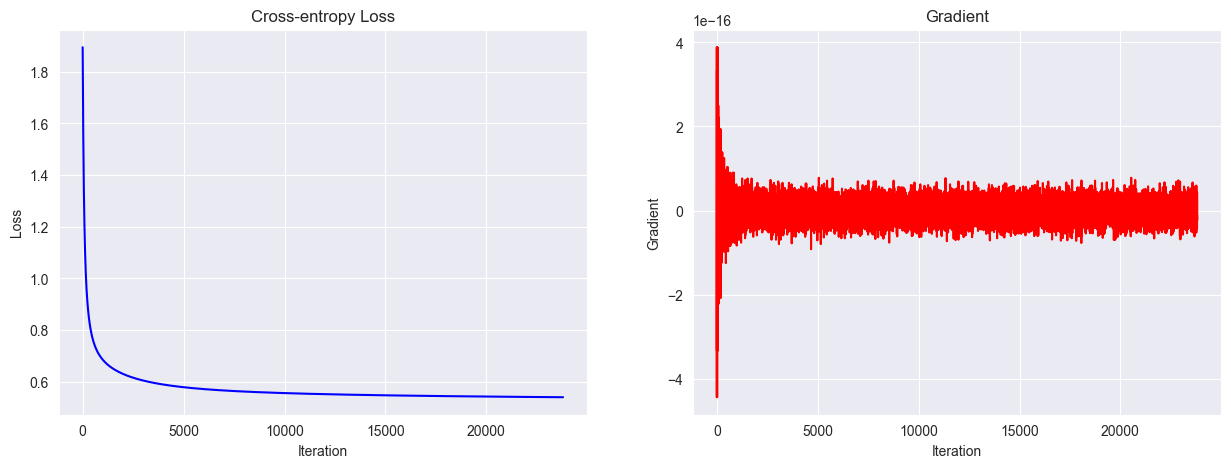

In [15]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Cross-entropy Loss")
ax.set_ylabel("Loss")
ax.set_xlabel("Iteration")
ax.plot(np.arange(model._iter_counter), model._error_values, color="b")

ax = fig.add_subplot(1, 2, 2)
ax.set_title("Gradient")
ax.set_ylabel("Gradient")
ax.set_xlabel("Iteration")
ax.plot(np.arange(model._iter_counter), model._grad_values, color="r")

plt.show()

## Evaluating Model

In [16]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_std)
print(f"Accuracy score for train data: {accuracy_score(y_train, y_train_pred)}")
y_test_pred = model.predict(X_test_std)
print(f"Accuracy score for test data: {accuracy_score(y_test, y_test_pred)}")

Accuracy score for train data: 0.875
Accuracy score for test data: 0.7105263157894737
